## Parameter Configuration

In [1]:
import sys
import numpy as np
import pandas as pd

from fairsearchcore.models import FairScoreDoc
import fairsearchcore as fsc
from codes.alg import FPRank, FSPR_model, best_FPRank
from codes.metrics import evaluate

######################################################################
# Column names
######################################################################

data = 'ICLR2017'
prt_attr = 'famous'
class_attr = 'h_c'
score_attr = 's'

######################################################################
# Configuration parameters
######################################################################

numBins = 10
bin_width = 0.1
score_norm = 10

filename = 'data/' + data
output_file = './results/' + data

## Loading Data

Min acceptability score = 0.2000, Max acceptability score = 0.9667


<AxesSubplot: xlabel='Class'>

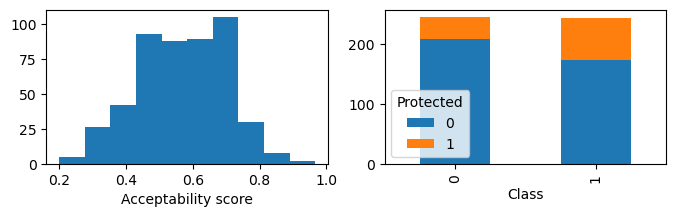

In [2]:
from codes.data_loader import load_data
import matplotlib.pyplot as plt

adj, data, W, s, y, prt = load_data(filename, class_attr, score_attr, prt_attr, score_norm = score_norm)
print('Min acceptability score = {:.4f}, Max acceptability score = {:.4f}'.format(np.min(s), np.max(s)))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,2))
ax1.hist(s)
ax1.set_xlabel('Acceptability score')

df = pd.DataFrame({'Class': y, 'Protected': prt}, dtype='int')
df.groupby(['Class', 'Protected']).size().unstack().plot(ax=ax2, kind='bar', stacked=True)

Total number of nodes = 488
Number of isolated nodes = 216


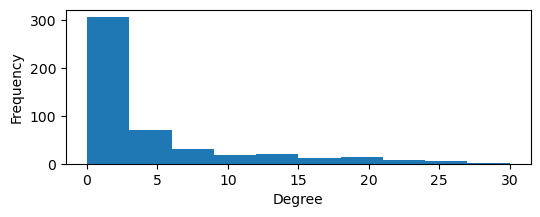

In [3]:
degrees = adj.sum(axis=1)
plt.figure(figsize=(6,2))
plt.hist(degrees)
plt.xlabel('Degree')
plt.ylabel('Frequency')

print('Total number of nodes =', degrees.shape[0])
print('Number of isolated nodes =', sum(degrees==0))

## Results for No Calibration

Results for No Calibration

  prec: 0.925668 |  Rank corr: 1.000000  | fp: 0.737705 | wsd: 0.085737 | wrd: 0.090545


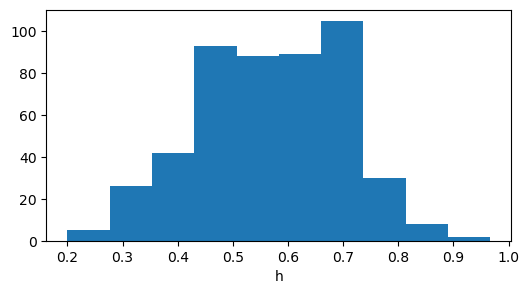

In [4]:
print('Results for No Calibration')
evaluate(s, y, s, prt, W, numBins = numBins, bin_width = bin_width)
out_df = pd.DataFrame({'h': s, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_Nocal.csv', index = False)

## Results for FPRank

In [5]:
results, params  = FPRank(W, s, y, prt, numBins = numBins, bin_width=bin_width)
out_df = pd.DataFrame(results)
out_df.to_csv(output_file + '_FPresults.csv', index=False)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

  alpha=0.0100, beta=0.1000: prec=0.9330, corr=0.9981, fp=0.7316, wsd=0.083521, wrd=0.090562
  alpha=0.0100, beta=0.1624: prec=0.9330, corr=0.9981, fp=0.7316, wsd=0.083186, wrd=0.090562
  alpha=0.0100, beta=0.2637: prec=0.9330, corr=0.9981, fp=0.7295, wsd=0.082640, wrd=0.090562
  alpha=0.0100, beta=0.4281: prec=0.9329, corr=0.9977, fp=0.7254, wsd=0.081751, wrd=0.090577
  alpha=0.0100, beta=0.6952: prec=0.9325, corr=0.9968, fp=0.7234, wsd=0.080291, wrd=0.090631
  alpha=0.0100, beta=1.1288: prec=0.9314, corr=0.9932, fp=0.7152, wsd=0.077874, wrd=0.090859
  alpha=0.0100, beta=1.8330: prec=0.9253, corr=0.9810, fp=0.7008, wsd=0.073710, wrd=0.091618
  alpha=0.0100, beta=2.9764: prec=0.9141, corr=0.9495, fp=0.6783, wsd=0.066973, wrd=0.093493
  alpha=0.0100, beta=4.8329: prec=0.8848, corr=0.8735, fp=0.6311, wsd=0.055170, wrd=0.094668
  alpha=0.0100, beta=7.8476: prec=0.8623, corr=0.8148, fp=0.5922, wsd=0.043415, wrd=0.070512
  alpha=0.0100, beta=12.7427: prec=0.8506, corr=0.7916, fp=0.5738, wsd

 10%|████████▎                                                                          | 1/10 [00:02<00:19,  2.16s/it]

  alpha=0.0100, beta=379.2690: prec=0.8281, corr=0.7612, fp=0.8627, wsd=0.041315, wrd=0.044922
  alpha=0.0100, beta=615.8482: prec=0.8326, corr=0.7698, fp=0.8422, wsd=0.041315, wrd=0.060047
  alpha=0.0100, beta=1000.0000: prec=0.8267, corr=0.7669, fp=0.8709, wsd=0.041319, wrd=0.062996
  alpha=0.0278, beta=0.1000: prec=0.9330, corr=0.9981, fp=0.7316, wsd=0.080676, wrd=0.090562
  alpha=0.0278, beta=0.1624: prec=0.9329, corr=0.9981, fp=0.7316, wsd=0.080357, wrd=0.090562
  alpha=0.0278, beta=0.2637: prec=0.9330, corr=0.9981, fp=0.7295, wsd=0.079839, wrd=0.090562
  alpha=0.0278, beta=0.4281: prec=0.9328, corr=0.9977, fp=0.7275, wsd=0.078993, wrd=0.090577
  alpha=0.0278, beta=0.6952: prec=0.9325, corr=0.9968, fp=0.7234, wsd=0.077606, wrd=0.090631
  alpha=0.0278, beta=1.1288: prec=0.9315, corr=0.9932, fp=0.7152, wsd=0.075317, wrd=0.090859
  alpha=0.0278, beta=1.8330: prec=0.9253, corr=0.9811, fp=0.7008, wsd=0.071354, wrd=0.091593
  alpha=0.0278, beta=2.9764: prec=0.9142, corr=0.9493, fp=0.678

 20%|████████████████▌                                                                  | 2/10 [00:04<00:16,  2.07s/it]

  alpha=0.0278, beta=379.2690: prec=0.8274, corr=0.7663, fp=0.9016, wsd=0.041295, wrd=0.062887
  alpha=0.0278, beta=615.8482: prec=0.8313, corr=0.7694, fp=0.8320, wsd=0.041295, wrd=0.060455
  alpha=0.0278, beta=1000.0000: prec=0.8264, corr=0.7593, fp=0.8668, wsd=0.041292, wrd=0.047453
  alpha=0.0774, beta=0.1000: prec=0.9329, corr=0.9981, fp=0.7316, wsd=0.073486, wrd=0.090192
  alpha=0.0774, beta=0.1624: prec=0.9329, corr=0.9981, fp=0.7316, wsd=0.073207, wrd=0.090192
  alpha=0.0774, beta=0.2637: prec=0.9329, corr=0.9981, fp=0.7316, wsd=0.072755, wrd=0.090192
  alpha=0.0774, beta=0.4281: prec=0.9327, corr=0.9977, fp=0.7275, wsd=0.072019, wrd=0.090207
  alpha=0.0774, beta=0.6952: prec=0.9325, corr=0.9968, fp=0.7234, wsd=0.070813, wrd=0.090260
  alpha=0.0774, beta=1.1288: prec=0.9314, corr=0.9932, fp=0.7193, wsd=0.068826, wrd=0.090117
  alpha=0.0774, beta=1.8330: prec=0.9253, corr=0.9811, fp=0.7008, wsd=0.065378, wrd=0.090850
  alpha=0.0774, beta=2.9764: prec=0.9140, corr=0.9491, fp=0.680

 30%|████████████████████████▉                                                          | 3/10 [00:06<00:13,  1.99s/it]

  alpha=0.0774, beta=379.2690: prec=0.8298, corr=0.7674, fp=0.8258, wsd=0.041238, wrd=0.062759
  alpha=0.0774, beta=615.8482: prec=0.8278, corr=0.7668, fp=0.8094, wsd=0.041240, wrd=0.064216
  alpha=0.0774, beta=1000.0000: prec=0.8312, corr=0.7683, fp=0.7951, wsd=0.041237, wrd=0.059211
  alpha=0.2154, beta=0.1000: prec=0.9331, corr=0.9981, fp=0.7316, wsd=0.057892, wrd=0.083993
  alpha=0.2154, beta=0.1624: prec=0.9330, corr=0.9981, fp=0.7316, wsd=0.057695, wrd=0.083994
  alpha=0.2154, beta=0.2637: prec=0.9330, corr=0.9980, fp=0.7316, wsd=0.057376, wrd=0.083994
  alpha=0.2154, beta=0.4281: prec=0.9326, corr=0.9977, fp=0.7295, wsd=0.056860, wrd=0.084367
  alpha=0.2154, beta=0.6952: prec=0.9323, corr=0.9968, fp=0.7275, wsd=0.056026, wrd=0.084780
  alpha=0.2154, beta=1.1288: prec=0.9312, corr=0.9931, fp=0.7193, wsd=0.054645, wrd=0.083583
  alpha=0.2154, beta=1.8330: prec=0.9252, corr=0.9810, fp=0.7008, wsd=0.052285, wrd=0.082525
  alpha=0.2154, beta=2.9764: prec=0.9135, corr=0.9491, fp=0.680

 40%|█████████████████████████████████▏                                                 | 4/10 [00:08<00:11,  2.00s/it]

  alpha=0.2154, beta=1000.0000: prec=0.8270, corr=0.7606, fp=0.8115, wsd=0.041075, wrd=0.046070
  alpha=0.5995, beta=0.1000: prec=0.9328, corr=0.9962, fp=0.7357, wsd=0.033831, wrd=0.033472
  alpha=0.5995, beta=0.1624: prec=0.9328, corr=0.9962, fp=0.7357, wsd=0.033852, wrd=0.033472
  alpha=0.5995, beta=0.2637: prec=0.9328, corr=0.9961, fp=0.7336, wsd=0.033893, wrd=0.033246
  alpha=0.5995, beta=0.4281: prec=0.9324, corr=0.9958, fp=0.7316, wsd=0.033978, wrd=0.033027
  alpha=0.5995, beta=0.6952: prec=0.9321, corr=0.9949, fp=0.7254, wsd=0.034154, wrd=0.033090
  alpha=0.5995, beta=1.1288: prec=0.9312, corr=0.9914, fp=0.7213, wsd=0.034542, wrd=0.033778
  alpha=0.5995, beta=1.8330: prec=0.9250, corr=0.9796, fp=0.7008, wsd=0.035392, wrd=0.035383
  alpha=0.5995, beta=2.9764: prec=0.9131, corr=0.9483, fp=0.6783, wsd=0.037180, wrd=0.039633
  alpha=0.5995, beta=4.8329: prec=0.8842, corr=0.8715, fp=0.6352, wsd=0.040205, wrd=0.049725
  alpha=0.5995, beta=7.8476: prec=0.8619, corr=0.8158, fp=0.5902, w

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:09<00:09,  1.96s/it]

  alpha=0.5995, beta=1000.0000: prec=0.8291, corr=0.7685, fp=0.7275, wsd=0.040643, wrd=0.060167
  alpha=1.6681, beta=0.1000: prec=0.9310, corr=0.9874, fp=0.7377, wsd=0.012621, wrd=0.000416
  alpha=1.6681, beta=0.1624: prec=0.9311, corr=0.9877, fp=0.7377, wsd=0.012794, wrd=0.000636
  alpha=1.6681, beta=0.2637: prec=0.9310, corr=0.9878, fp=0.7377, wsd=0.013086, wrd=0.000699
  alpha=1.6681, beta=0.4281: prec=0.9307, corr=0.9875, fp=0.7357, wsd=0.013587, wrd=0.000696
  alpha=1.6681, beta=0.6952: prec=0.9304, corr=0.9866, fp=0.7316, wsd=0.014466, wrd=0.000754
  alpha=1.6681, beta=1.1288: prec=0.9295, corr=0.9844, fp=0.7254, wsd=0.016064, wrd=0.001664
  alpha=1.6681, beta=1.8330: prec=0.9246, corr=0.9746, fp=0.7111, wsd=0.019061, wrd=0.003382
  alpha=1.6681, beta=2.9764: prec=0.9146, corr=0.9477, fp=0.6783, wsd=0.024604, wrd=0.006956
  alpha=1.6681, beta=4.8329: prec=0.8870, corr=0.8798, fp=0.6414, wsd=0.033416, wrd=0.026163
  alpha=1.6681, beta=7.8476: prec=0.8600, corr=0.8170, fp=0.5922, w

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:12<00:08,  2.06s/it]

  alpha=1.6681, beta=615.8482: prec=0.8256, corr=0.7636, fp=0.7357, wsd=0.039481, wrd=0.045186
  alpha=1.6681, beta=1000.0000: prec=0.8298, corr=0.7674, fp=0.6332, wsd=0.039481, wrd=0.057255
  alpha=4.6416, beta=0.1000: prec=0.9311, corr=0.9859, fp=0.7377, wsd=0.002979, wrd=0.000025
  alpha=4.6416, beta=0.1624: prec=0.9310, corr=0.9859, fp=0.7377, wsd=0.003049, wrd=0.000025
  alpha=4.6416, beta=0.2637: prec=0.9309, corr=0.9858, fp=0.7377, wsd=0.003171, wrd=0.000025
  alpha=4.6416, beta=0.4281: prec=0.9305, corr=0.9855, fp=0.7357, wsd=0.003383, wrd=0.000022
  alpha=4.6416, beta=0.6952: prec=0.9304, corr=0.9850, fp=0.7336, wsd=0.003771, wrd=0.000041
  alpha=4.6416, beta=1.1288: prec=0.9296, corr=0.9826, fp=0.7295, wsd=0.004517, wrd=0.000139
  alpha=4.6416, beta=1.8330: prec=0.9253, corr=0.9743, fp=0.7193, wsd=0.006052, wrd=0.000483
  alpha=4.6416, beta=2.9764: prec=0.9158, corr=0.9534, fp=0.6926, wsd=0.009408, wrd=0.001587
  alpha=4.6416, beta=4.8329: prec=0.8968, corr=0.9061, fp=0.6639,

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:13<00:05,  1.76s/it]

  alpha=4.6416, beta=1000.0000: prec=0.8134, corr=0.7495, fp=0.7234, wsd=0.036611, wrd=0.038951
  alpha=12.9155, beta=0.1000: prec=0.9312, corr=0.9859, fp=0.7439, wsd=0.000521, wrd=0.000016
  alpha=12.9155, beta=0.1624: prec=0.9310, corr=0.9859, fp=0.7439, wsd=0.000536, wrd=0.000013
  alpha=12.9155, beta=0.2637: prec=0.9309, corr=0.9858, fp=0.7418, wsd=0.000563, wrd=0.000021
  alpha=12.9155, beta=0.4281: prec=0.9306, corr=0.9856, fp=0.7377, wsd=0.000611, wrd=0.000018
  alpha=12.9155, beta=0.6952: prec=0.9305, corr=0.9851, fp=0.7357, wsd=0.000702, wrd=0.000024
  alpha=12.9155, beta=1.1288: prec=0.9298, corr=0.9831, fp=0.7316, wsd=0.000884, wrd=0.000062
  alpha=12.9155, beta=1.8330: prec=0.9264, corr=0.9768, fp=0.7234, wsd=0.001270, wrd=0.000217
  alpha=12.9155, beta=2.9764: prec=0.9189, corr=0.9608, fp=0.7029, wsd=0.002142, wrd=0.000770
  alpha=12.9155, beta=4.8329: prec=0.9043, corr=0.9249, fp=0.6783, wsd=0.004136, wrd=0.002025
  alpha=12.9155, beta=7.8476: prec=0.8775, corr=0.8606, fp

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:14<00:03,  1.71s/it]

  alpha=12.9155, beta=615.8482: prec=0.8020, corr=0.7262, fp=0.7520, wsd=0.030576, wrd=0.036491
  alpha=12.9155, beta=1000.0000: prec=0.8030, corr=0.7325, fp=0.7869, wsd=0.030576, wrd=0.039396
  alpha=35.9381, beta=0.1000: prec=0.9315, corr=0.9859, fp=0.7439, wsd=0.000078, wrd=0.000023
  alpha=35.9381, beta=0.1624: prec=0.9311, corr=0.9859, fp=0.7439, wsd=0.000080, wrd=0.000013
  alpha=35.9381, beta=0.2637: prec=0.9311, corr=0.9858, fp=0.7439, wsd=0.000085, wrd=0.000011
  alpha=35.9381, beta=0.4281: prec=0.9307, corr=0.9855, fp=0.7398, wsd=0.000093, wrd=0.000004
  alpha=35.9381, beta=0.6952: prec=0.9305, corr=0.9851, fp=0.7398, wsd=0.000109, wrd=0.000009
  alpha=35.9381, beta=1.1288: prec=0.9296, corr=0.9834, fp=0.7357, wsd=0.000143, wrd=0.000022
  alpha=35.9381, beta=1.8330: prec=0.9269, corr=0.9782, fp=0.7275, wsd=0.000217, wrd=0.000076
  alpha=35.9381, beta=2.9764: prec=0.9194, corr=0.9643, fp=0.7131, wsd=0.000389, wrd=0.000229
  alpha=35.9381, beta=4.8329: prec=0.9076, corr=0.9356,

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:16<00:01,  1.53s/it]

  alpha=35.9381, beta=1000.0000: prec=0.7574, corr=0.5847, fp=0.7582, wsd=0.021012, wrd=0.015370
  alpha=100.0000, beta=0.1000: prec=0.9316, corr=0.9858, fp=0.7439, wsd=0.000011, wrd=0.000039
  alpha=100.0000, beta=0.1624: prec=0.9315, corr=0.9858, fp=0.7439, wsd=0.000011, wrd=0.000019
  alpha=100.0000, beta=0.2637: prec=0.9311, corr=0.9858, fp=0.7439, wsd=0.000012, wrd=0.000012
  alpha=100.0000, beta=0.4281: prec=0.9308, corr=0.9855, fp=0.7398, wsd=0.000013, wrd=0.000005
  alpha=100.0000, beta=0.6952: prec=0.9307, corr=0.9851, fp=0.7398, wsd=0.000015, wrd=0.000003
  alpha=100.0000, beta=1.1288: prec=0.9296, corr=0.9834, fp=0.7357, wsd=0.000021, wrd=0.000003
  alpha=100.0000, beta=1.8330: prec=0.9269, corr=0.9785, fp=0.7316, wsd=0.000033, wrd=0.000019
  alpha=100.0000, beta=2.9764: prec=0.9203, corr=0.9658, fp=0.7172, wsd=0.000062, wrd=0.000082
  alpha=100.0000, beta=4.8329: prec=0.9081, corr=0.9388, fp=0.6947, wsd=0.000128, wrd=0.000203
  alpha=100.0000, beta=7.8476: prec=0.8862, corr

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:17<00:00,  1.70s/it]

  alpha=100.0000, beta=615.8482: prec=0.6996, corr=0.3888, fp=0.7295, wsd=0.010763, wrd=0.008125
  alpha=100.0000, beta=1000.0000: prec=0.6973, corr=0.3935, fp=0.7439, wsd=0.010763, wrd=0.007509


Range of evaluation measures:
   Precision: 0.6972975928242273 0.9330964205620091
   Fairness perception: 0.5614754098360656 0.9098360655737705
   WSD: 0.08352145066415174 1.0666492253300925e-05
   WRD: 0.09466838704698262 2.6240764033385337e-06

Best parameters: alpha = 12.9155, beta = 0.1000 (util = 0.9244)

Result for FPRank:

  prec: 0.931230 |  Rank corr: 0.985872  | fp: 0.743852 | wsd: 0.000521 | wrd: 0.000016


{'precision': 0.9312296263606343,
 'corr': 0.9858718891200207,
 'fairperception': 0.7438524590163934,
 'wsd': 0.0005210599443890259,
 'wrd': 1.602033053746428e-05}

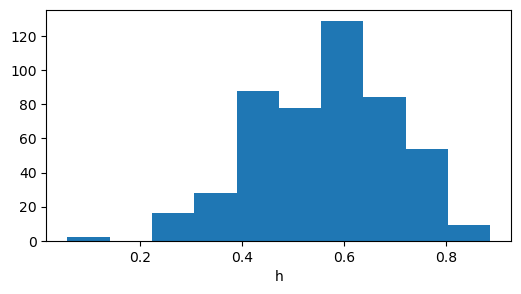

In [6]:
print('Range of evaluation measures:')
print('   Precision:', np.min(results['precision']), np.max(results['precision']))
print('   Fairness perception:', np.min(results['fairperception']), np.max(results['fairperception']))
print('   WSD:', np.max(results['wsd']), np.min(results['wsd']))
print('   WRD:', np.max(results['wrd']), np.min(results['wrd']))

h, bestparam, utils = best_FPRank(results, params)
out_df = pd.DataFrame({'h': h, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_FPRank.csv', index = False)
print('\nResult for FPRank:')
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for InFoRM

Require InFoRM package that can be downloaded from https://github.com/jiank2/inform

In [7]:
from InFoRM import utils
from InFoRM.method.debias_model import DebiasModel
from scipy.sparse import csc_matrix

def debias_mining_model(adj, s, alpha=0., metric='cosine'):
    # init params
    c = 0.85

    sp_adj = csc_matrix(adj)
    adj = utils.symmetric_normalize(sp_adj)
    
    # build similarity matrix
    sim = utils.filter_similarity_matrix(utils.get_similarity_matrix(adj, metric=metric), sigma=0.75)
    sim = utils.symmetric_normalize(sim)

    # debias pagerank
    FairModel = DebiasModel()
    
    personalization = s.reshape(-1,1)
    personalization = personalization/personalization.sum()
    
    r = FairModel.pagerank(adj, sim, alpha, c=c, personalization=personalization)
    r = np.array([list(r.values())])
    r = csc_matrix(np.array(r).transpose())

    return r


  prec: 0.704424 |  Rank corr: 0.499478  | fp: 0.688525 | wsd: 0.000001 | wrd: 0.126196


{'precision': 0.7044243429996102,
 'corr': 0.49947783646924626,
 'fairperception': 0.6885245901639344,
 'wsd': 1.3162387383269663e-06,
 'wrd': 0.12619634563288587}

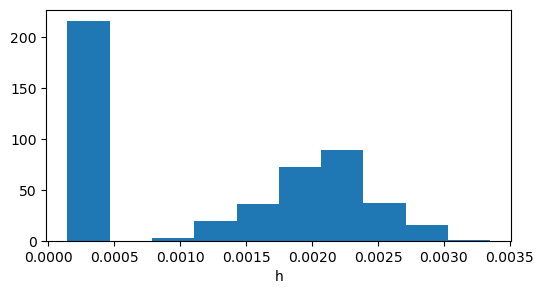

In [8]:
h = debias_mining_model(adj, s).toarray().flatten()
out_df = pd.DataFrame({'h': h, prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_INFORM.csv', index = False)
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for FSPR

     pcost       dcost       gap    pres   dres
 0: -3.1613e+01 -6.1214e+02  3e+03  2e+00  7e-16
 1: -1.0101e+01 -2.1046e+02  3e+02  8e-02  6e-16
 2: -1.2884e+00 -9.0671e+00  9e+00  2e-03  1e-15
 3: -1.1614e+00 -2.1039e+00  1e+00  2e-04  5e-16
 4: -1.2462e+00 -1.9590e+00  7e-01  4e-05  3e-16
 5: -1.3160e+00 -1.6142e+00  3e-01  2e-05  3e-16
 6: -1.3447e+00 -1.5190e+00  2e-01  2e-16  3e-16
 7: -1.3906e+00 -1.4391e+00  5e-02  3e-16  3e-16
 8: -1.4064e+00 -1.4120e+00  6e-03  2e-16  3e-16
 9: -1.4088e+00 -1.4090e+00  2e-04  4e-16  3e-16
10: -1.4089e+00 -1.4089e+00  5e-06  4e-16  3e-16
11: -1.4089e+00 -1.4089e+00  1e-07  2e-16  3e-16
Optimal solution found.

  prec: 0.775960 |  Rank corr: 0.580594  | fp: 0.680328 | wsd: 0.008458 | wrd: 0.108565


{'precision': 0.7759595812074116,
 'corr': 0.580594052951511,
 'fairperception': 0.680327868852459,
 'wsd': 0.008458035185698258,
 'wrd': 0.10856497055234521}

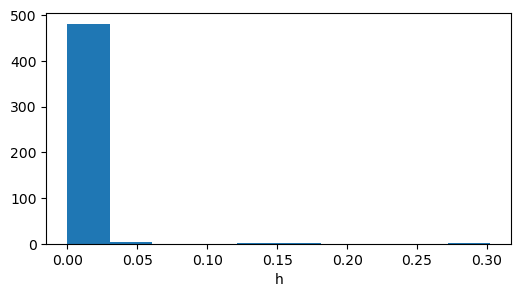

In [9]:
h = FSPR_model(adj, s, prt)
out_df = pd.DataFrame({'h': h.ravel(), prt_attr :data[prt_attr]})
out_df.to_csv(output_file + '_FSPR.csv', index = False)
evaluate(h.ravel(), y, s, prt, W, numBins = numBins, bin_width = bin_width)

## Results for FairTopk

Require fairsearchcore library from https://github.com/fair-search/fairsearch-fair-python

Result for FairTopK:

  prec: 0.894722 |  Rank corr: 0.903832  | fp: 0.784836 | wsd: 0.109211 | wrd: 0.096572


{'precision': 0.8947219166713641,
 'corr': 0.903831542933749,
 'fairperception': 0.7848360655737705,
 'wsd': 0.10921061473882876,
 'wrd': 0.0965722118453666}

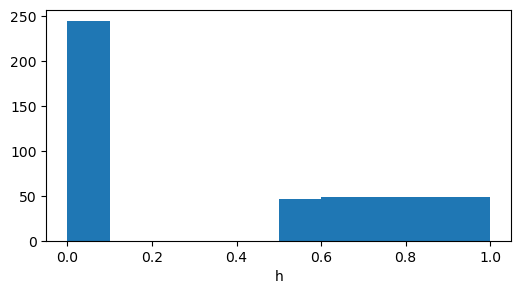

In [10]:
from codes.data_loader import load_data_fairtopk

rankings, k, p, data = load_data_fairtopk(filename, class_attr, score_attr, prt_attr, factor=1)

alpha = 0.1
fair = fsc.Fair(k, p, alpha)
re_ranked = fair.re_rank(rankings)
eps = 1/len(rankings)
h = np.zeros(len(rankings))
for i,item in enumerate(re_ranked):
    h[item.id] = 1 - i*eps
out_df = pd.DataFrame({'h': h, prt_attr : data[prt_attr]})
out_df.to_csv(output_file + '_FairTopk.csv', index = False)

print('Result for FairTopK:')
evaluate(h, y, s, prt, W, numBins = numBins, bin_width = bin_width)